In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x=np.load('ch5_data.npz')
x.files
X=x['X']
X_min=x['X_min']
X_max=x['X_max']
X_n=x['X_n']
T=x['T']

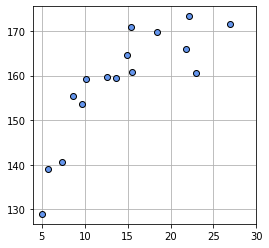

In [19]:
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    return mse

xn=100
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)

J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))


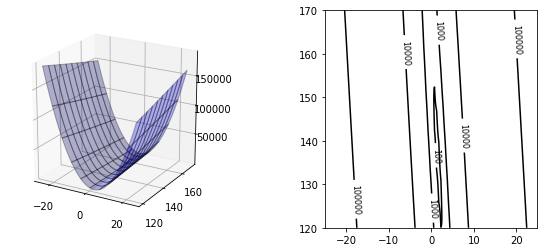

In [26]:
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.show()

In [33]:
#경사 하강법 (위 그래프에서 대략 w0=10,w1=165이 최소인것으로 보이므로 이를 기준으로 잡음,학습률은 0.001, eps보다 작으면 탐색 종료)
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean((y-t))
    return d_w0,d_w1

def fit_line_num(x,t):
    w_init=[10.0,165.0]
    alpha=0.001
    i_max=100000
    eps=0.1
    w_i=np.zeros([i_max,2])
    w_i[0,:]=w_init
    
    for i in range(1,i_max):
        dmse=dmse_line(x,t,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps:
            break
    w0=w_i[i,0]
    w1=w_i[i,1]
    w_i=w_i[:i,:]
    return w0,w1,dmse,w_i
        

반복횟수 13820
W=[1.539947,136.176160]
dMSE=[-0.005794,0.099991]
MSE=49.027452


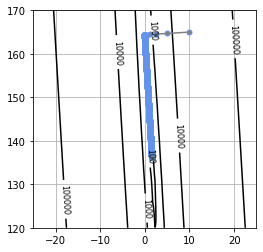

In [35]:
plt.figure(figsize=(4,4))
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

W0,W1,dMSE,W_history=fit_line_num(X,T)

print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-',color='grey',markersize=10,markeredgecolor='cornflowerblue')
plt.show()

w0=1.540,w1=136.176
SD=7.002cm


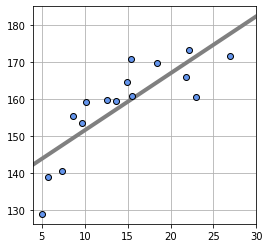

In [43]:
def show_line(w):
    xb=np.linspace(X_min,X_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)

plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse=mse_line(X,T,W)
print('w0={0:.3f},w1={1:.3f}'.format(W0,W1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()